-------------

### <font color = 'green'> **About Dataset**

- This Data includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.
- FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts’ FIFA series.
- The dataset contains information of all 18207 players from the latest edition FIFA 19. There are 89 attributes including personal information like age, name, nationality, photo, club, wage, etc, and also player skill information like ball control, dribbling, crossing, finishing, GK skills and etc.

- Data source : https://sofifa.com/?r=190075&set=true
- Inspired from this dataset: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

### <font color = 'green'> **1. Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
# Styling
#!pip install colorama
from colorama import Fore, Back, Style

import warnings
warnings.filterwarnings('ignore')

### <font color = 'green'> **2. Import and understand the dataset**
<font size=3> i) Check info
    
<font size=3> ii) Check a few samples
    
<font size=3> iii) Check statistical summary 
    

In [ ]:
fifadata = pd.read_csv("fifa19_data.csv")
fifadata.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
fifadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
fifadata.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


### <font color = 'green'> **3. Data Preprocessing** 


<font size=3> 3.1 Drop unnecessary columns such as Unnamed: 0,ID,Photo,Club Logo,Jersey Number,Flag
    
<font size=3> Try to automate it without providing hardcoded feature names

In [ ]:
# Drop columns

print(Fore.GREEN + "\n\nDo you wish to drop any columns ? ", Fore.BLACK + "<yes> or <no>")
answer_drop = str(input())

if answer_drop == 'yes':
    print(Fore.GREEN + "\nEnter the column names seprated by",Fore.BLACK + "<,>")
    print(Style.RESET_ALL)
    Drop_col = str(input())
    Trans = list(Drop_col.split(","))
    for i in range(len(Trans)):
        a = Trans[i]
        fifadata = fifadata.drop(Drop_col, axis = 1)



Do you wish to drop any columns ?  <yes> or <no>
yes

Enter the column names seprated by <,>

Flag


In [ ]:
fifadata.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


<font size=3> 3.2 Drop duplicate values if present

In [ ]:
fifadata.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
fifadata.duplicated().any()

False

<font size=3> 3.3 Check for missing data and impute them using an appropriate method

In [ ]:
fifadata.isna().sum()

Name                 0
Age                  0
Nationality          0
Overall              0
Potential            0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 83, dtype: int64

Clearly there are missing values present.

#### Missing value treatment

- Missing values can be dropped or replaced with mean, median, mode or constant value depending upon the amount of missing data present. 
- SimpleImputer or KNNImputer are few classes in python which can be used to treat them. 
- If missing values are more than ~40% we can drop them.

In [ ]:
# Styling
from colorama import Fore, Back, Style

Row = fifadata.shape[0]
Column = fifadata.shape[1]

print(Fore.GREEN + "\nMissing or null values:")
print(Style.RESET_ALL)
print(fifadata.isnull().sum())


import time
time.sleep(10)

print(Fore.GREEN + "\n\nDo you wish to do any replacements ? ",Fore.BLACK + "<yes> or <no>")
answer_replacement = str(input())

if answer_replacement == 'yes':
    print(Fore.GREEN + "\nDo you want to replce missing values by",Fore.BLACK + "<zero> or <median> or <mean> or <drop> ?")
    print(Style.RESET_ALL)
    Replace_option = str(input())
    if Replace_option == 'zero':
        fifadata = fifadata.fillna('0')
        print(Fore.GREEN + "Replaced all missing values by ZERO")
    elif Replace_option == 'median':
        fifadata = fifadata.replace({'NaN':fifadata.median()})
        print(Fore.GREEN + "Replaced all missing values by MEDIAN")
    elif Replace_option == 'mean':
        fifadata = fifadata.replace({'NaN':fifadata.mean()})
        print(Fore.GREEN + "Replaced all missing values by MEAN")
    elif Replace_option == 'drop':
        fifadata = fifadata.dropna()
        print(Fore.GREEN + "Rows with mising values have been dropped")
        print(Fore.GREEN + "\nCurrent shape of dataset is:",Fore.BLACK + "",fifadata.shape)
    print(Style.RESET_ALL) 

elif answer_replacement == 'no':
    print("Data set good to be used, nothing to replace ")


Missing or null values:

Name                 0
Age                  0
Nationality          0
Overall              0
Potential            0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 83, dtype: int64


Do you wish to do any replacements ?  <yes> or <no>
yes

Do you want to replce missing values by <zero> or <median> or <mean> or <drop> ?

zero
Replaced all missing values by ZERO



In [ ]:
fifadata.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 83, dtype: int64

<font size=3> 3.4 There are certain columns having expressions in it (example:- 'LS', 'ST', 'RS', 'LW', etc.). Convert these string expression values to integers.
    
<font size=3> Write a function to automate it

In [ ]:
def skillConversions(x) :
    if type(x) == str :
        return eval(x)
    else :
        return x

Converting the following columns from string to the integer value for evaluation.

In [ ]:
columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM','RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for col in columns :
    fifadata[col] = fifadata[col].apply(skillConversions) # converting the string values to integers

In [ ]:
fifadata["LS"].head()

0    90
1    94
2    87
3     0
4    85
Name: LS, dtype: int64

<font size=3> 3.5 From data we can see that Height and Weight are written with their units. Convert them into meaningful values.

In [ ]:
fifadata[['Height', 'Weight']].head() # Need to convert height and weight as well

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [ ]:
def weightConversion(x) :
    if type(x) == str :
        return int(x.split('lbs')[0])
    else :
        return int(x)

In [ ]:
fifadata['Weight'] = fifadata['Weight'].apply(weightConversion)

In [ ]:
fifadata['Weight'].head()

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: int64

In [ ]:
def heightConversion(x) :
    if type(x) == str and len(x)>1:
        y = x.split("'")
        return int(y[0]) * 12 + int(y[1])
    else :
        return int(x)

In [ ]:
fifadata['Height'] = fifadata['Height'].apply(heightConversion)

In [ ]:
fifadata['Height'].head()

0    67
1    74
2    69
3    76
4    71
Name: Height, dtype: int64

<font size=3> 3.6 Analyse the following two features and replace garbage values with meaningful data.
 - 'Body Type'
 - Preferred Foot'
 - 'Work Rate'
 - 'Real Face'
 - 'Position'

In [ ]:
fifadata['Body Type'][fifadata['Body Type'] == 'Messi'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 'Ronaldo'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'C. Ronaldo'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'Neymar'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'Courtois'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 'Shaqiri'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'Akinfenwa'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 0] = 'Normal'
fifadata['Preferred Foot'][fifadata['Preferred Foot'] == 0] = 'NA'
fifadata['Work Rate'][fifadata['Work Rate'] == 0] = 'Medium/ Medium'
fifadata['Real Face'][fifadata['Real Face'] == 0] = 'No'
fifadata['Position'][fifadata['Position'] == 0] = 'NA'

<font size=3>  3.7 Analyse the 'Wage' & 'Value' columns and remove the special characters and make it numerical

In [ ]:
# This method is used to modify the Wage and Value attributes of the data by removing the "€" symbol.
def modifyValue(x):
    return x.replace('€','')

In [ ]:
wage = fifadata['Wage'].apply(modifyValue)

# Evaluating the Wage and Value attributes to their proper integer value

fifadata['Wage'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int) 

In [ ]:
fifadata['Wage'].head()

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int32

In [ ]:
value = fifadata['Value'].apply(modifyValue)
fifadata['Value'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex = True).map(pd.eval).astype(int)

<font size=3>  3.8 Perform label encoding on each object dtype column through a function

lets check label encoding on a single feature/column

In [ ]:
le = LabelEncoder()
list_GKDiving = list(fifadata["GKDiving"])
transformed_list = le.fit_transform(list_GKDiving)
fifadata["GKDiving"] = transformed_list
fifadata["GKDiving"]

0        38
1        49
2        70
3        71
4         7
         ..
18202     2
18203     2
18204    38
18205     6
18206     2
Name: GKDiving, Length: 18207, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include = ['object']).columns)
    for col in list_cols:
        df[col] = le.fit_transform(list(df[col]))

In [ ]:
categorical_to_numeric(fifadata)
fifadata.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,9632,31,6,94,94,213,565000,565000,2202,1,...,84,25,20,17,38,3,7,6,62,294
1,3153,33,123,94,94,327,405000,405000,2228,2,...,83,19,23,14,49,3,7,6,3,83
2,12508,26,20,92,93,436,290000,290000,2143,2,...,82,18,16,25,70,68,7,7,3,295
3,4136,27,139,91,93,376,260000,260000,1471,2,...,56,6,13,4,71,65,76,76,76,105
4,8617,27,13,91,92,375,355000,355000,2281,2,...,76,63,51,44,7,5,36,2,5,233


<font size=3>  3.9 Check the outliers and handle them appropriately

We can remove/treat outliers using quantile(25%), quantile(75%) and Inter Quantile Range(IQR) by calculating Lower and Upper Whiskers. But first we need to find outliers

#### Finding outliers through Boxplot

Lets check outliers for few features

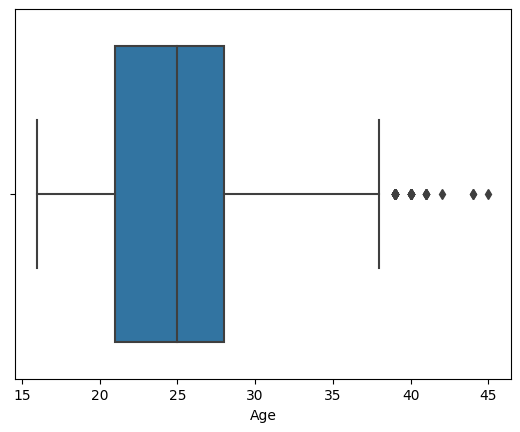

In [ ]:
sns.boxplot(data = fifadata, x = fifadata["Age"])
plt.show()

As we can see there are few outliers in Age feature

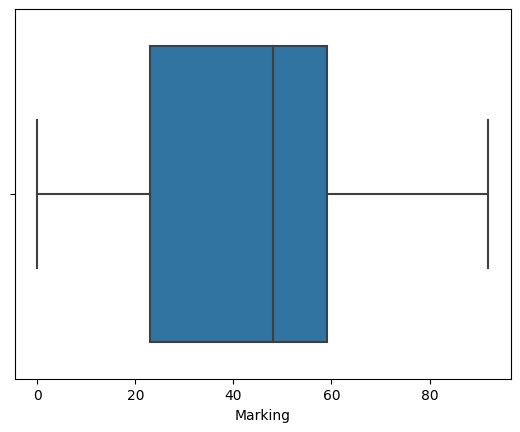

In [ ]:
sns.boxplot(data = fifadata, x = fifadata["Marking"])
plt.show()

No outliers in Marking feature

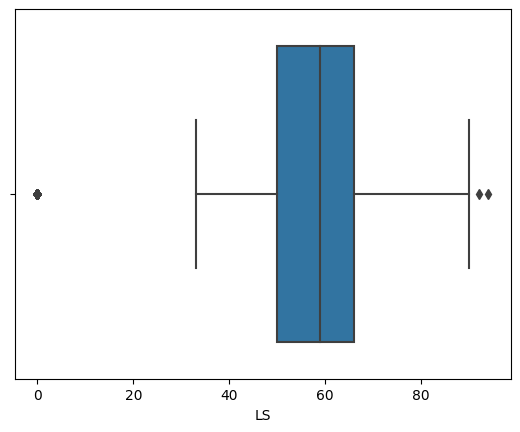

In [ ]:
sns.boxplot(data = fifadata, x = fifadata["LS"])
plt.show()

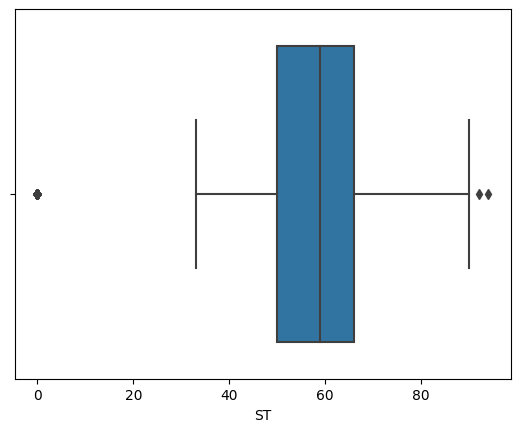

In [ ]:
sns.boxplot(data = fifadata, x = fifadata["ST"])
plt.show()

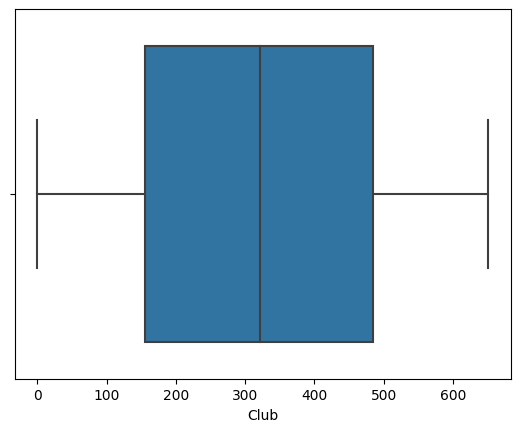

In [ ]:
sns.boxplot(data = fifadata, x = fifadata["Club"])
plt.show()

Below is function to remove outliers from all the columns, if present.

In [ ]:
def remove_outliers(df):
    cols = list(df.columns)
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR)))]
    print('Outliers removed Successfully')

In [ ]:
remove_outliers(fifadata)

Outliers removed Successfully


In [ ]:
fifadata.shape

(18207, 83)

-------------------

### <font color = 'green'> **4. Data Analysis**

### <font color = 'green'> **Univariate Anaysis**

<font size=3>   4.1 Check the total number of clubs present in the data

In [ ]:
fifadata['Club'].nunique() # There are 652 unique clubs present in the dataset

652

<font size=3>   4.2 Check distribution of Age

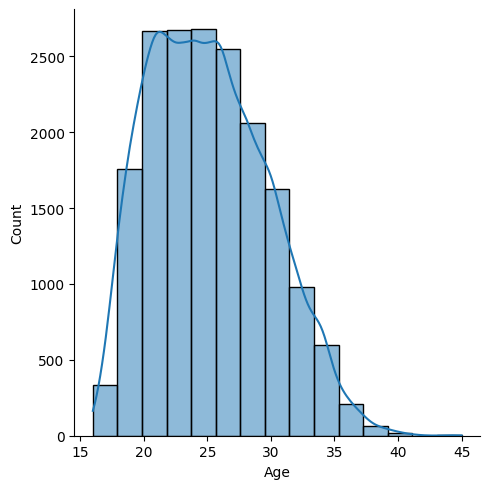

In [ ]:
sns.displot(fifadata["Age"], bins = 15, kde = True)
plt.show()

Age feature is slightly right skewed

<font size=3>   4.3 Check the distribution of Club

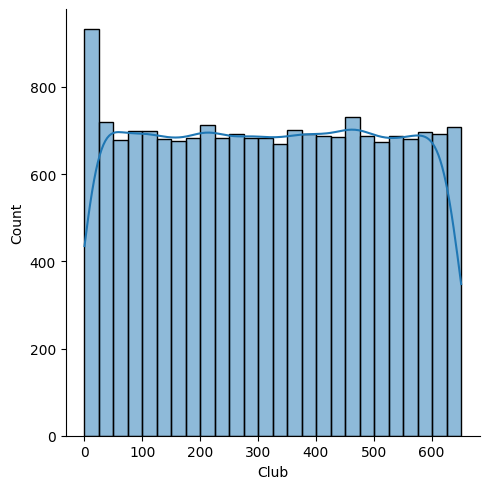

In [ ]:
sns.displot(data = fifadata["Club"],kde = True)
plt.show()

Club feature shows normal distribution.

<font size=3>   4.4 Check wages for each club
- We may need this data further, hence we will create separate dataframe for this

In [ ]:
# fifadata.Club.value_counts()
clubData = {'Club': fifadata["Club"], 'Overall' : fifadata["Overall"] , 'Wage': fifadata["Wage"]}
clubDataDf = pd.DataFrame(clubData, columns = ['Club', 'Overall', 'Wage'])
clubDataDf

,Club,Overall,Wage
0,213,94,565000
1,327,94,405000
2,436,92,290000
3,376,91,260000
4,375,91,355000
...,...,...,...
18202,166,47,1000
18203,588,47,1000
18204,123,47,1000
18205,587,47,1000


<font size=3>  4.5 Find mean overall value for each club

In [ ]:
club_dict = dict(fifadata["Club"].value_counts())
#print(club_dict)
def findValue(x):
    return club_dict[x]

In [ ]:
overallList =[]
p = 0;
for i in clubDataDf.values:
    overallList.append(i[1]/findValue(i[0])) 
    # Dividing the Overall of each row by the Club count so that when we do groupby, we get the appropriate mean Overall value for the club
x = np.reshape(overallList, (len(overallList), 1)) 
new_club_data = clubDataDf.drop(columns = ['Overall'], inplace = False)
new_club_data['Overall'] = x

#### Mean overall value for each club is :

In [ ]:
new_club_data

,Club,Wage,Overall
0,213,565000,2.848485
1,327,405000,3.760000
2,436,290000,3.066667
3,376,260000,2.757576
4,375,355000,2.757576
...,...,...,...
18202,166,1000,1.678571
18203,588,1000,1.740741
18204,123,1000,1.678571
18205,587,1000,1.678571


In [ ]:
new_club_data['Overall'].isnull().unique()

array([False])

<font size=3>   4.6 What is the economy for each group of club? (Hint : economy is overall divided by wages)

In [ ]:
new_club_data = new_club_data.groupby(by = 'Club', as_index = False).sum() # Grouping the data by the Clubs and taking their sum.
new_club_data['Economy'] = new_club_data['Overall'] / new_club_data['Wage']
new_club_data

,Club,Wage,Overall,Economy
0,0,123000,65.586207,0.000533
1,1,0,67.224066,inf
2,2,125000,65.750000,0.000526
3,3,44000,63.384615,0.001441
4,4,372000,70.785714,0.000190
...,...,...,...,...
647,647,27000,60.760000,0.002250
648,648,193000,66.900000,0.000347
649,649,40000,60.481481,0.001512
650,650,45000,63.545455,0.001412


<font size=3>   4.7  Find Top 10 Economical Clubs

In [ ]:
# Interpreatation of Economy : How much overall a Club can get for every Euro spent.
new_club_data.sort_values(by = ['Economy'], ascending = True).head(10)

,Club,Wage,Overall,Economy
471,471,5017000,78.242424,0.000016
213,213,4837000,78.030303,0.000016
375,375,3741000,76.727273,0.000021
376,376,3391000,77.242424,0.000023
135,135,3249000,76.787879,0.000024
327,327,3292000,82.280000,0.000025
364,364,2902000,76.000000,0.000026
53,53,2588000,75.181818,0.000029
584,584,2623000,76.696970,0.000029
215,215,2286000,77.000000,0.000034


### <font color = 'green'> **Bivariate Analysis**

<font size=3>   4.8 Check the Economy of each club using Barplot of seaborn library

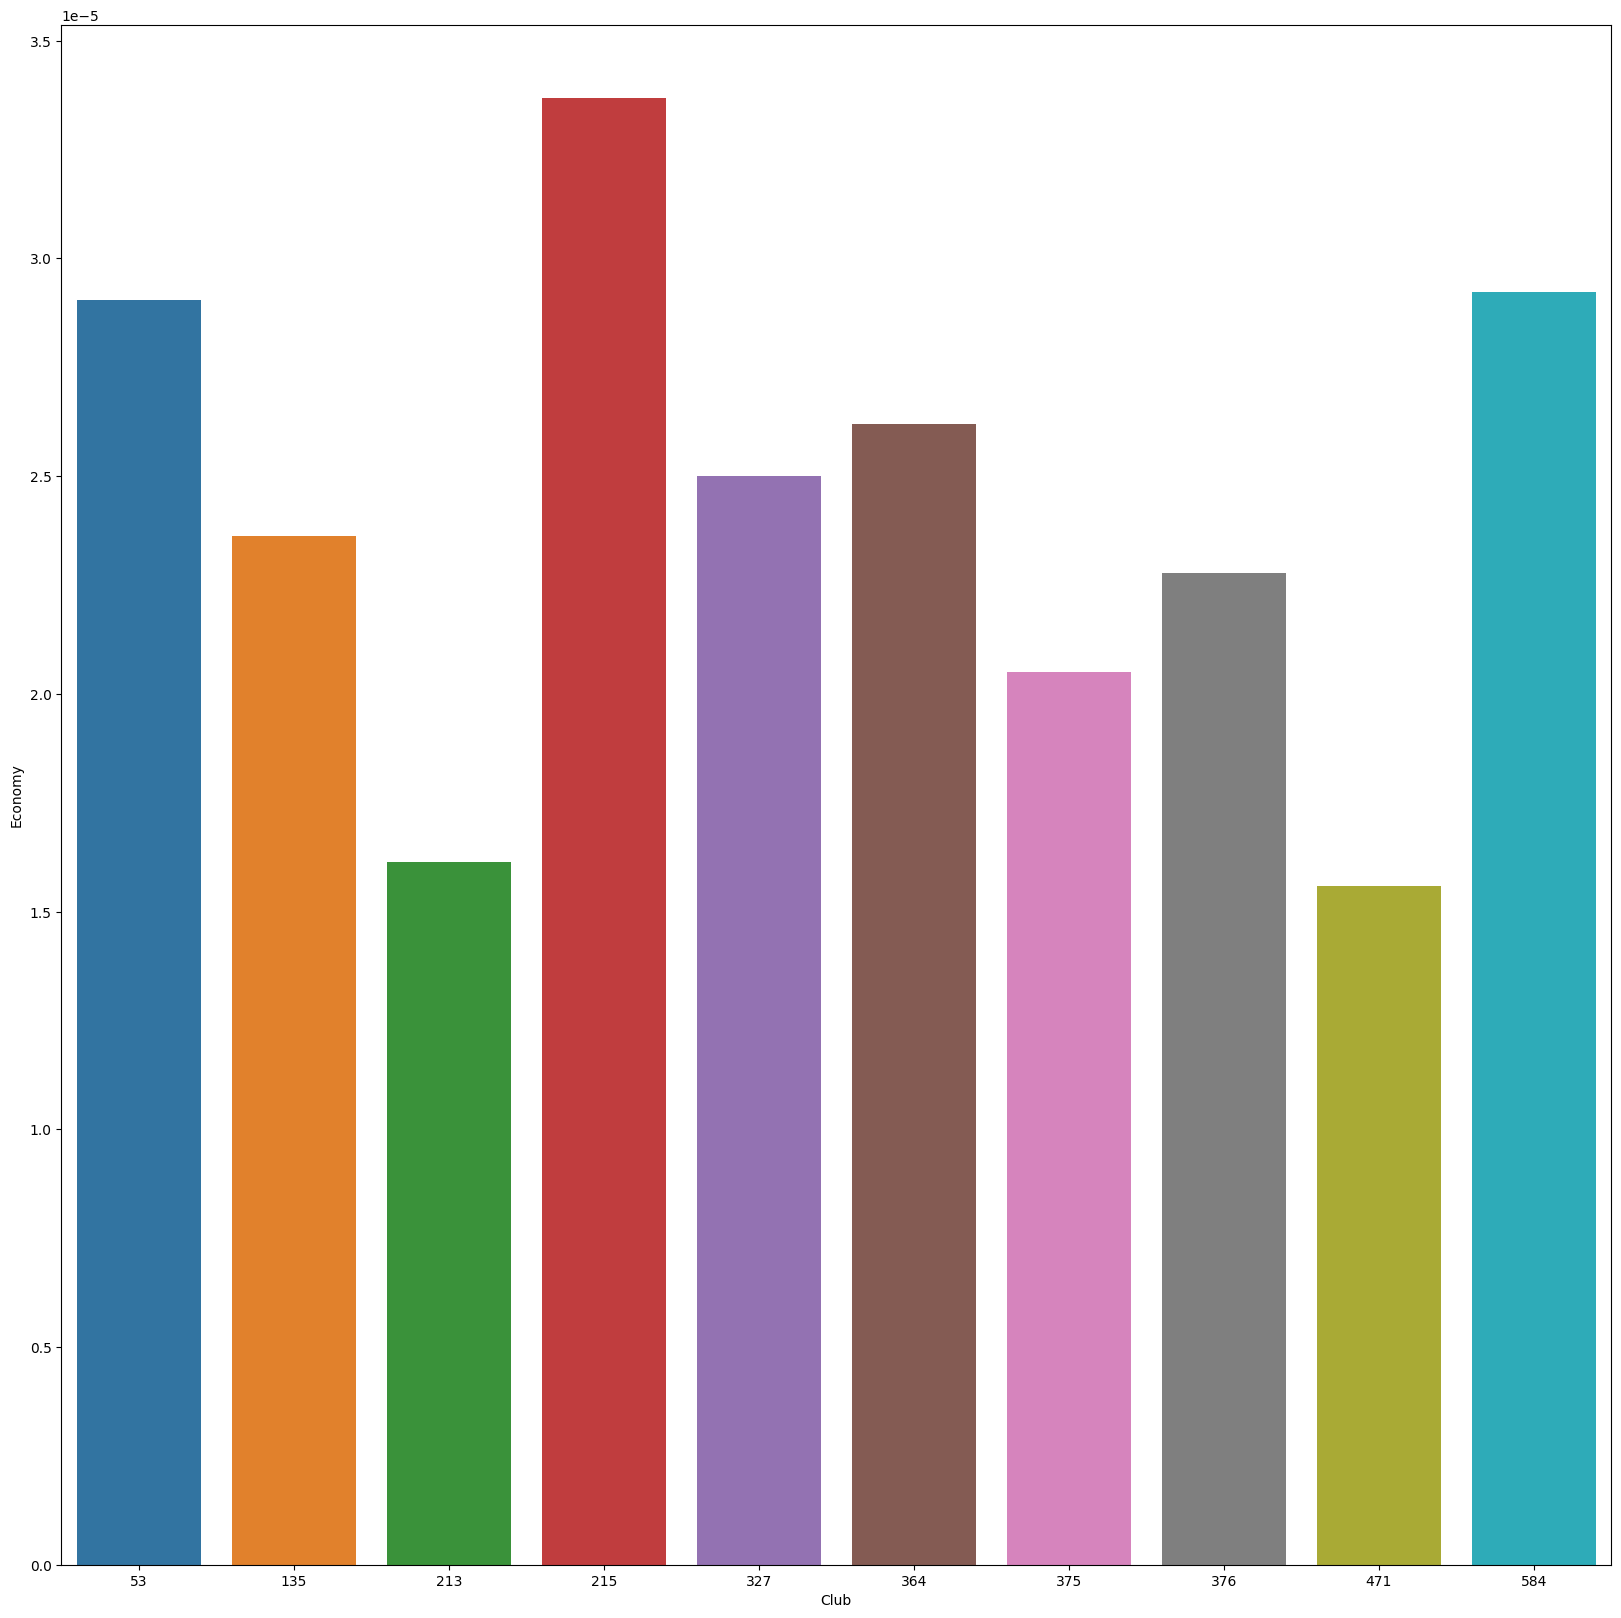

In [ ]:
plt.figure(figsize = (20,20))
sns.barplot(x = 'Club', y = 'Economy', data = new_club_data.sort_values(by = 'Economy', ascending = True). head(10))
plt.show()

<font size=3>  4.9 What is the relationship between age and individual potential of the player? Create a new DF having these two features

In [ ]:
# Age, Potential, SprintSpeed
data = {'Age': fifadata["Age"], 'Potential' : fifadata["Potential"]}
performanceDataDf = pd.DataFrame(data, columns = ['Age', 'Potential'])
performanceDataDf

,Age,Potential
0,31,94
1,33,94
2,26,93
3,27,93
4,27,92
...,...,...
18202,19,65
18203,19,63
18204,16,67
18205,17,66


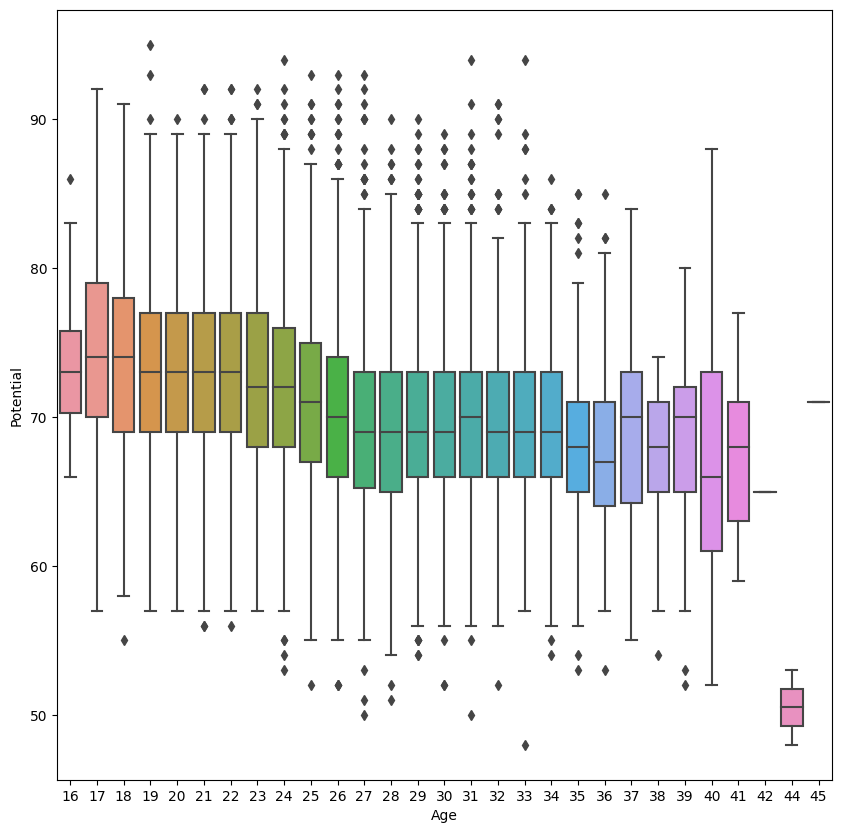

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Age', y = 'Potential', data = performanceDataDf)
plt.show()

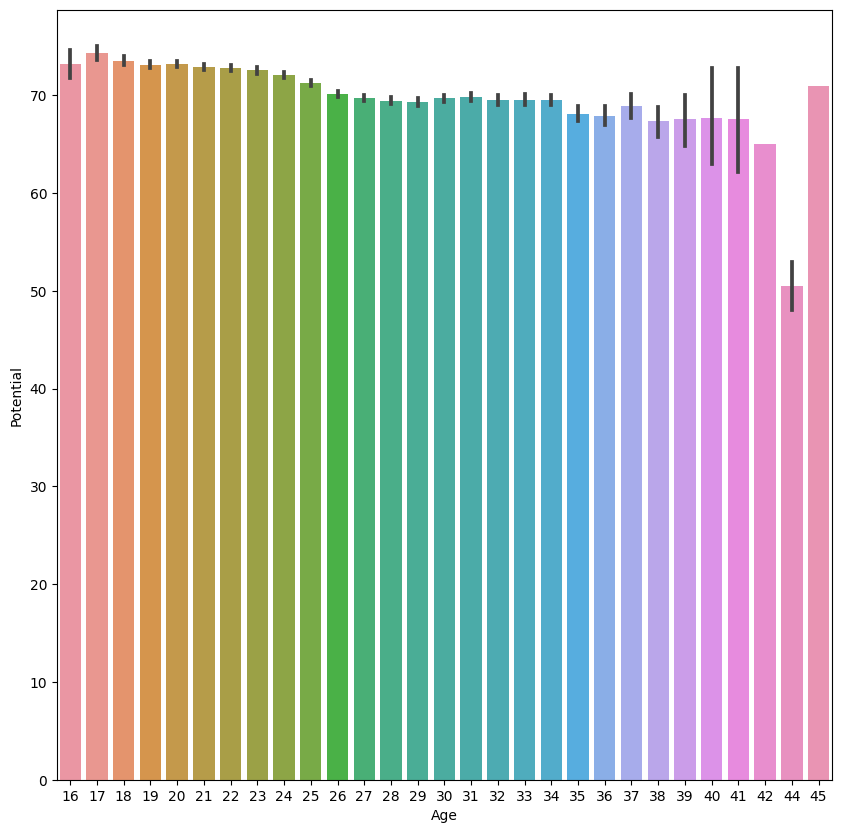

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'Age', y = 'Potential', data = performanceDataDf)
plt.show()

We can observe that the Age is inversely proportional to the Potential of the player. A player shows average peak potential at the age of 17 and the maximum potential at the age of 19 which can be seen as an outlier in the boxplot. After that it decreases and remain almost the same till the age of 34. There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

We can also observe the same through the correlation matrix below. For that we need to normalize these values first

### <font color = 'green'> **Standardization**

<font size=3>   4.10 Normalize the above two columns using Sklearn library's StandardScaler class which uses z-score for standardization

In [ ]:
scaler = StandardScaler()
performanceDataDf_standardised = scaler.fit_transform(performanceDataDf[['Age','Potential']])
performanceDataDf_standardised = pd.DataFrame(performanceDataDf_standardised, columns = ['Age', 'Potential'])
performanceDataDf_standardised.corr()

,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


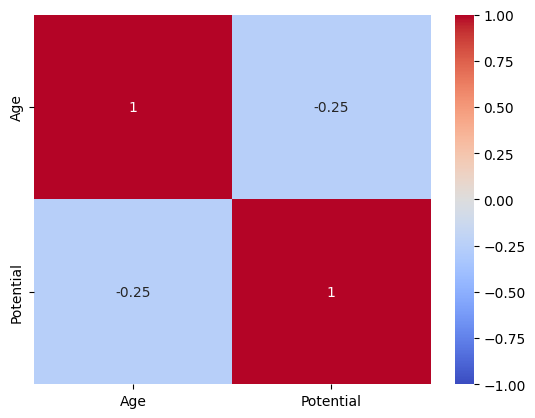

In [ ]:
sns.heatmap(performanceDataDf.corr(), vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

As it is negative value in the correlation matrix, we can conclude that Age and Potential are inversely proportional.

<font size=3>  4.11 Add 'Value' feature to the above created DF performanceDataDf and perform analysis between three columns

In [ ]:
performanceDataDf['Value'] = fifadata['Value']
performanceDataDf

,Age,Potential,Value
0,31,94,565000
1,33,94,405000
2,26,93,290000
3,27,93,260000
4,27,92,355000
...,...,...,...
18202,19,65,1000
18203,19,63,1000
18204,16,67,1000
18205,17,66,1000


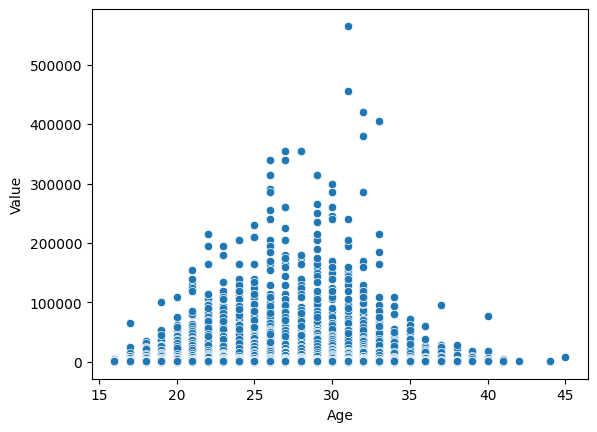

In [ ]:
sns.scatterplot(x = 'Age', y = 'Value', data = performanceDataDf, palette = 'Set1')
plt.show()

There is a steep increase in the Value of a Player till the age of 27-28years and after that it gradually starts decreasing, It hits the lowest at the age of 45 and the Value hits the highest in the age between 25-30.

In [ ]:
ageValue_df = scaler.transform(performanceDataDf[['Age','Value']])
ageValue_df = pd.DataFrame(ageValue_df, columns = ['Age','Value'])
ageValue_df.corr()

,Age,Value
Age,1.000000,0.141145
Value,0.141145,1.000000


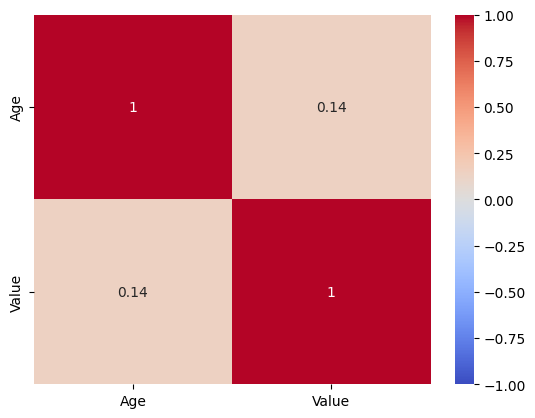

In [ ]:
sns.heatmap(ageValue_df.corr(), vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

Its not a very strong relationship. With the heatmap it can be seen that Value is not much impacted by Age.

In [ ]:
performanceDataDf["Pace"] = fifadata["SprintSpeed"]

In [ ]:
mean_pace = np.mean(performanceDataDf['Pace'])
mean_pace = round(mean_pace, 1)
performanceDataDf['Pace'].fillna(value = mean_pace, inplace = True)
performanceDataDf

,Age,Potential,Value,Pace
0,31,94,565000,75
1,33,94,405000,80
2,26,93,290000,79
3,27,93,260000,47
4,27,92,355000,65
...,...,...,...,...
18202,19,65,1000,46
18203,19,63,1000,28
18204,16,67,1000,58
18205,17,66,1000,49


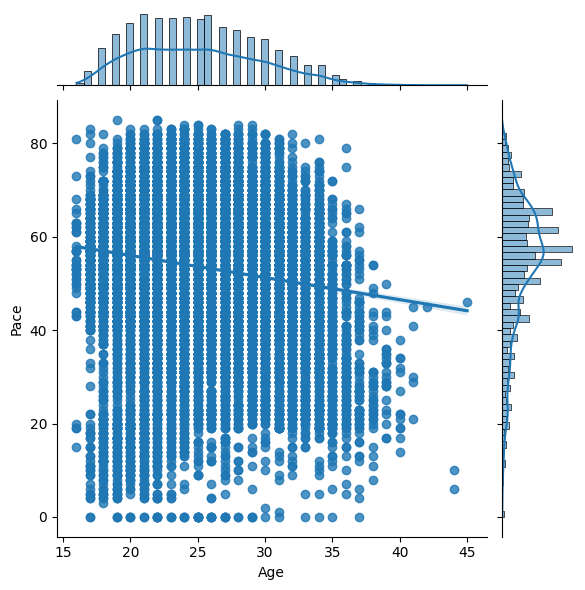

In [ ]:
sns.jointplot(performanceDataDf['Age'], performanceDataDf['Pace'], kind = 'reg')
plt.show()

It can be seen that the Pace data is right skewed with mean almost at 65.
The pace of a player is at the lowest at the age of 45

<font size=3>   4.12 Which skill sets are helpful in deciding a player's potential? Select as per your understanding

In [ ]:
# we can make a skill set to decide a player's potential 
skill_data_df = fifadata[["Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy",
                         "LongPassing","BallControl","Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower",
                         "Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision",
                         "Penalties","Composure","Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling","GKKicking",
                         "GKPositioning","GKReflexes", "Potential"]]
skill_data_df.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Potential
0,79,93,65,82,82,94,88,90,78,90,...,84,25,20,17,38,3,7,6,62,94
1,79,92,85,73,83,84,75,71,68,88,...,83,19,23,14,49,3,7,6,3,94
2,73,84,56,76,80,93,82,83,69,89,...,82,18,16,25,70,68,7,7,3,93
3,8,4,12,40,4,9,12,10,42,33,...,56,6,13,4,71,65,76,76,76,93
4,89,79,48,84,78,82,79,79,83,85,...,76,63,51,44,7,5,36,2,5,92


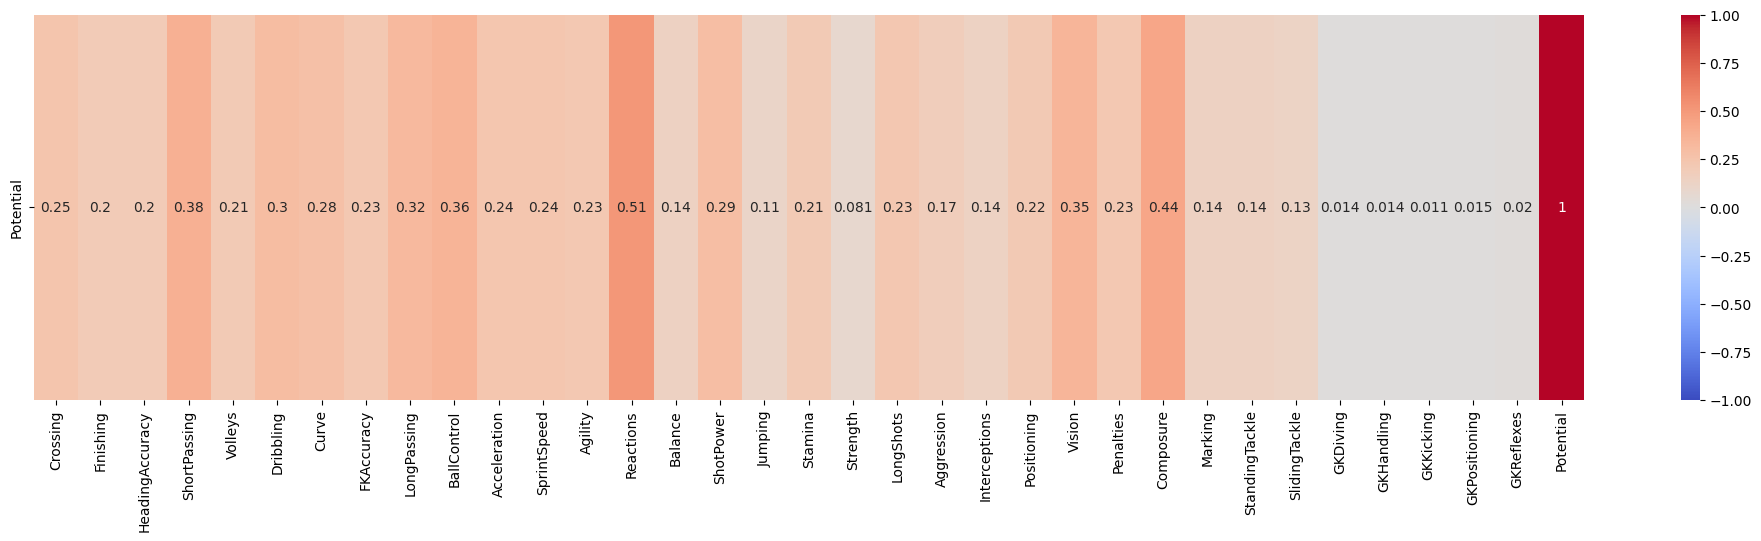

In [ ]:
plt.figure(figsize = (25,5))
a = skill_data_df.corr().loc['Potential':]
sns.heatmap(a, vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

From the Heatmap, we can observe that Reactions, Composure, Vision and ShortPassing are the only columns which have comparatively greater impact on the Potentail of a player.

Lets see the Potential vs each impacted skill

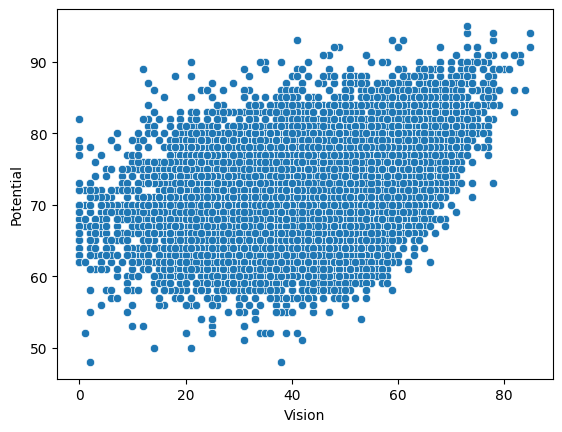

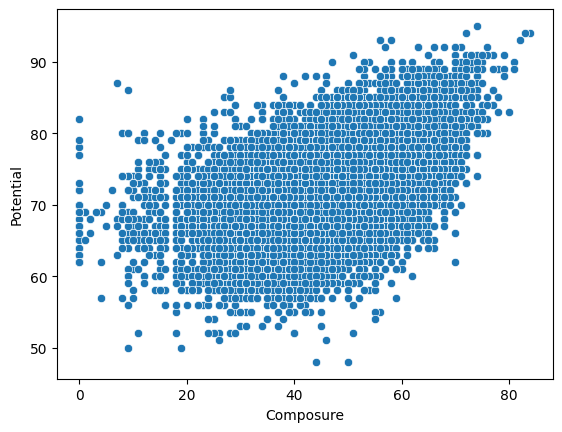

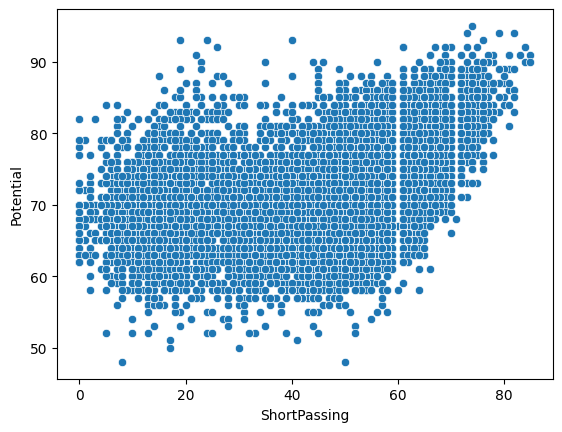

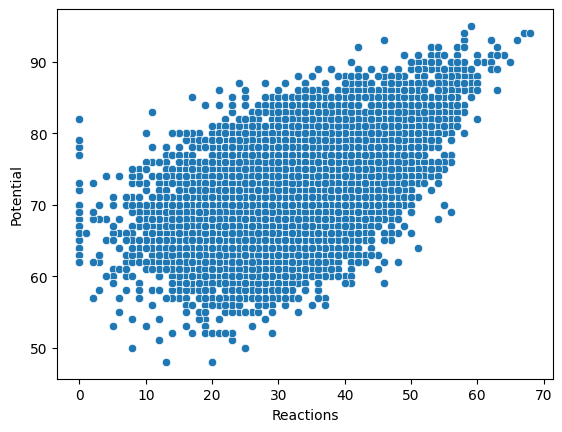

In [ ]:
sns.scatterplot(x = 'Vision', y = 'Potential', data = skill_data_df)
plt.show()
sns.scatterplot(x = 'Composure', y = 'Potential', data = skill_data_df)
plt.show()
sns.scatterplot(x = 'ShortPassing', y = 'Potential', data = skill_data_df)
plt.show()
sns.scatterplot(x = 'Reactions', y = 'Potential', data = skill_data_df)
plt.show()

<font size=3>   4.13 How do the traits contribute to the players' potential?

In [ ]:
trails_potential_df = {'Special' : fifadata['Special'], 'Height' : fifadata['Height'], 'Weight' : fifadata['Weight'],
                      'Agility' : fifadata['Agility'], 'Composure' : fifadata['Composure'], 'Potential' : fifadata['Potential']}
trails_potential_df = pd.DataFrame(trails_potential_df)
trails_potential_df

,Special,Height,Weight,Agility,Composure,Potential
0,2202,67,159,76,84,94
1,2228,74,183,72,83,94
2,2143,69,150,81,82,93
3,1471,76,168,45,56,93
4,2281,71,154,64,76,92
...,...,...,...,...,...,...
18202,1307,69,134,45,33,65
18203,1098,75,170,23,30,63
18204,1189,68,148,35,29,67
18205,1228,70,154,37,34,66


#### Lets Normalizing these values using Sklearn library's StandardScaler class which uses z-score for standardization

In [ ]:
scaler = StandardScaler()
trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']] = scaler.fit_transform(trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']])

In [ ]:
trails_potential_df

,Special,Height,Weight,Agility,Composure,Potential
0,2.216573,-0.924129,-0.368612,1.847300,3.204881,3.698092
1,2.311958,0.626007,0.983773,1.579809,3.119382,3.698092
2,2.000121,-0.481233,-0.875757,2.181665,3.033884,3.535128
3,-0.465223,1.068903,0.138532,-0.225760,0.810930,3.535128
4,2.506397,-0.038337,-0.650359,1.044825,2.520895,3.372164
...,...,...,...,...,...,...
18202,-1.066885,-0.481233,-1.777347,-0.225760,-1.155529,-1.027862
18203,-1.833636,0.847455,0.251231,-1.696964,-1.412024,-1.353790
18204,-1.499788,-0.702681,-0.988456,-0.894489,-1.497522,-0.701934
18205,-1.356710,-0.259785,-0.650359,-0.760743,-1.070031,-0.864898


In [ ]:
potential = trails_potential_df.corr().loc['Potential':]
potential

,Special,Height,Weight,Agility,Composure,Potential
Potential,0.383727,0.024638,0.011892,0.225081,0.43725,1.0


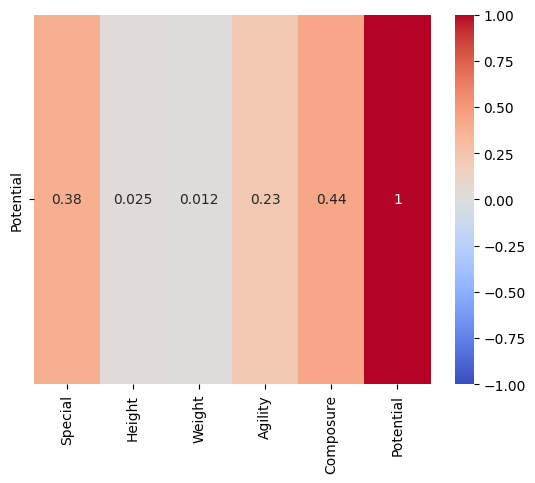

In [ ]:
sns.heatmap(potential, vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

From the heatmap, we can observe that Composure, Special and Agility have the highest impact among others towards the Potential of a player.

Lets see each with respect to Potential

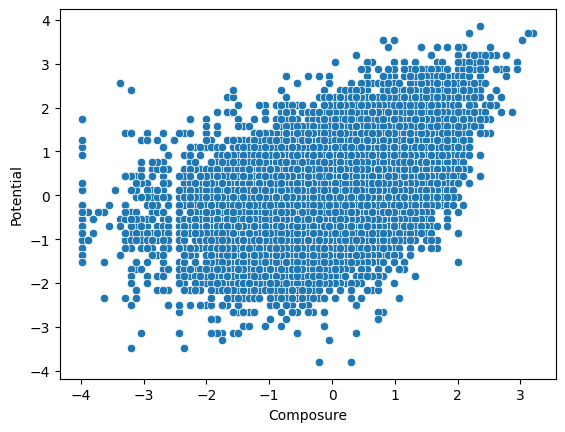

In [ ]:
sns.scatterplot(x = 'Composure', y = 'Potential', data = trails_potential_df)
plt.show()

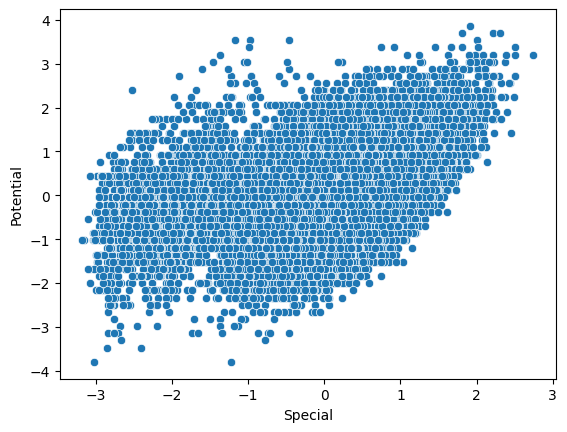

In [ ]:
sns.scatterplot(x = 'Special', y = 'Potential', data = trails_potential_df)
plt.show()

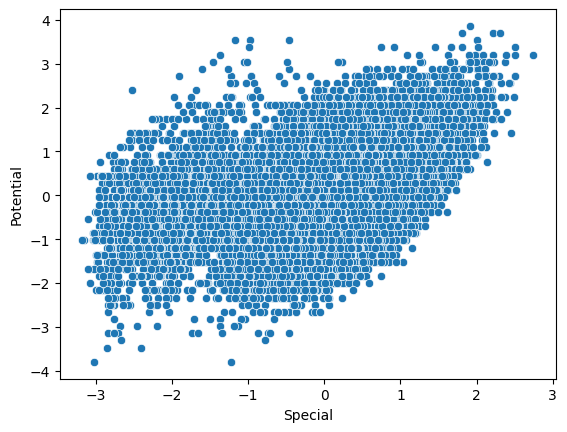

In [ ]:
sns.scatterplot(x = 'Special', y = 'Potential', data = trails_potential_df)
plt.show()

<font size=3>   4.14 Which features directly contribute to the wages of the players?
(Hint: Use Potential, Overall, Value, Special, International Reputation and Wage features only)

In [ ]:
wage_data = {'Potential' : skill_data_df['Potential'], 'Overall' : fifadata['Overall'], 'Value' : fifadata['Value'],
             'Special' : fifadata['Special'], 'International Reputation' : fifadata['International Reputation'],
             'Wage' : fifadata['Wage']}
wage_data_df = pd.DataFrame(wage_data)
wage_data_df

,Potential,Overall,Value,Special,International Reputation,Wage
0,94,94,565000,2202,5,565000
1,94,94,405000,2228,5,405000
2,93,92,290000,2143,5,290000
3,93,91,260000,1471,4,260000
4,92,91,355000,2281,4,355000
...,...,...,...,...,...,...
18202,65,47,1000,1307,1,1000
18203,63,47,1000,1098,1,1000
18204,67,47,1000,1189,1,1000
18205,66,47,1000,1228,1,1000


In [ ]:
wage_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Potential                 18207 non-null  int64
 1   Overall                   18207 non-null  int64
 2   Value                     18207 non-null  int32
 3   Special                   18207 non-null  int64
 4   International Reputation  18207 non-null  int64
 5   Wage                      18207 non-null  int32
dtypes: int32(2), int64(4)
memory usage: 1.3 MB


In [ ]:
# Normalize/Standardize wage_data_df data
scaler = StandardScaler()
wage_data_df[['Value', 'Wage', 'Special']] = scaler.fit_transform(wage_data_df[['Value', 'Wage', 'Special']])

In [ ]:
wage_data_df

,Potential,Overall,Value,Special,International Reputation,Wage
0,94,94,25.240993,2.216573,5,25.240993
1,94,94,17.967832,2.311958,5,17.967832
2,93,92,12.740247,2.000121,5,12.740247
3,93,91,11.376529,-0.465223,4,11.376529
4,92,91,15.694969,2.506397,4,15.694969
...,...,...,...,...,...,...
18202,65,47,-0.396902,-1.066885,1,-0.396902
18203,63,47,-0.396902,-1.833636,1,-0.396902
18204,67,47,-0.396902,-1.499788,1,-0.396902
18205,66,47,-0.396902,-1.356710,1,-0.396902


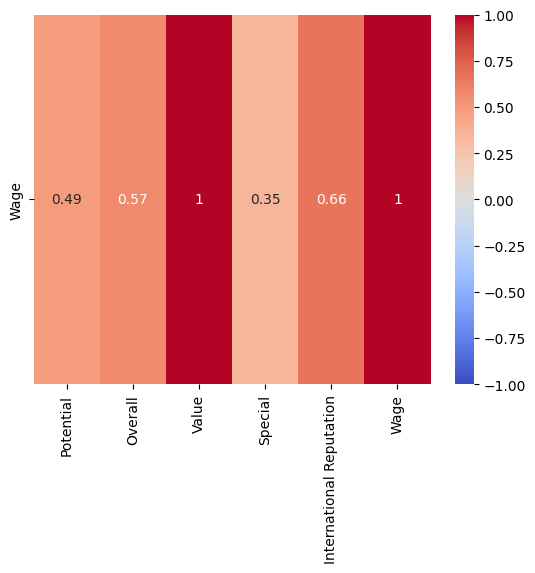

In [ ]:
wage_corr_matrix = wage_data_df.corr().loc['Wage':]
sns.heatmap(wage_corr_matrix, vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

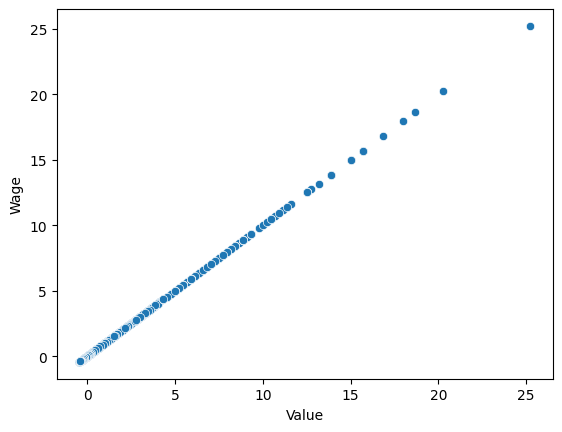

In [ ]:
sns.scatterplot(x = 'Value', y ='Wage', data = wage_data_df)
plt.show()

So the Wage of a player is directly proprtional to the Value of a player. If the value of the player increases, the wage of the player also increases monotonically. This is also seen from the Heatmap.

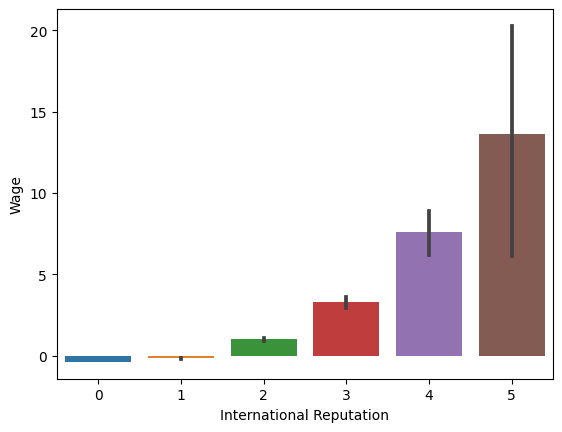

In [ ]:
sns.barplot(x = 'International Reputation', y ='Wage', data = wage_data_df)
plt.show()

Same goes for the International Feature of the player. The value increases if the Internaional Reputation of a player increases.

<font size=3>  4.15 What is the age distribution in different clubs? Which club has most players young?

In [ ]:
age_club_datadf = pd.DataFrame({'Age': fifadata['Age'], 'Club' : fifadata['Club']})
age_club_datadf

,Age,Club
0,31,213
1,33,327
2,26,436
3,27,376
4,27,375
...,...,...
18202,19,166
18203,19,588
18204,16,123
18205,17,587


Grouping the data by clubs and getting their mean age

In [ ]:
datas = round(age_club_datadf.groupby(by='Club', as_index=False).mean(),2)
datas = datas.sort_values(by = 'Age', ascending = True) 
# sorting the grouped by club data according to age in order to get youngest age group club in the beginning
datas.head(10) 

,Club,Age
232,232,20.26
222,222,21.42
84,84,21.48
238,238,21.68
211,211,21.93
349,349,22.00
203,203,22.04
560,560,22.07
189,189,22.11
72,72,22.11


Club 232 which is FC Nordsjælland club, has the most young players. We can also visualize this using barplot

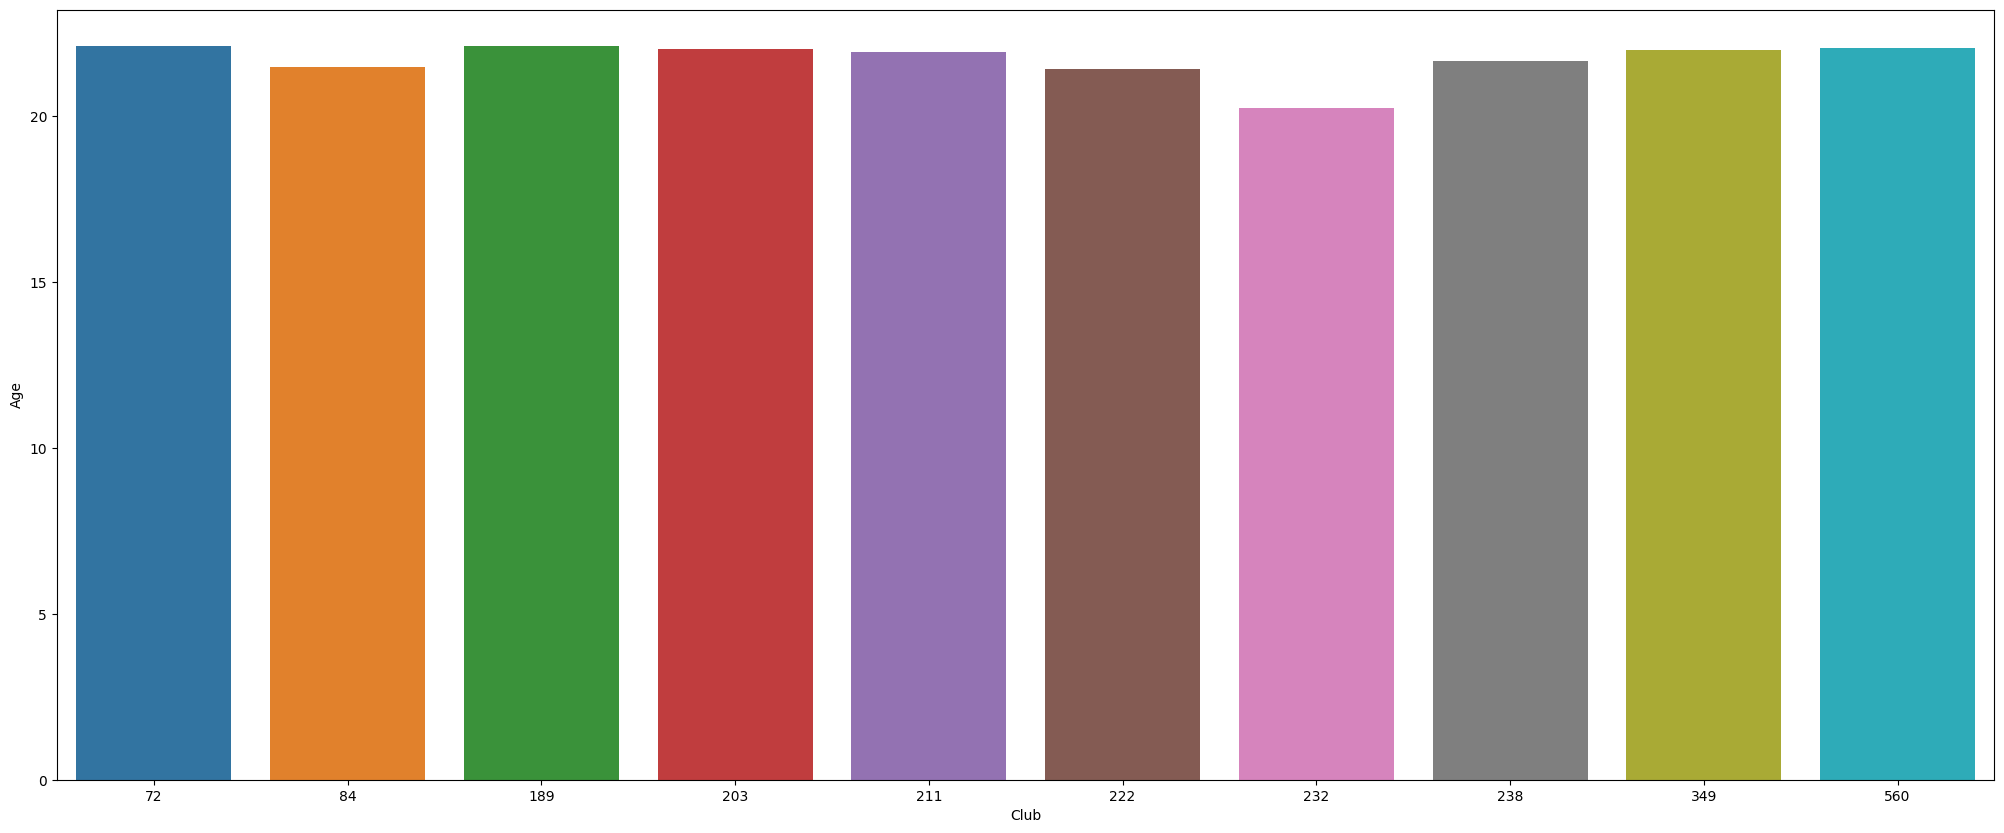

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x = 'Club', y = 'Age', data = datas.head(10))
plt.show()

### <font color = 'green'> **Multivariate Analysis**

<font size=3>   4.16 Check correlation of all features using heatmap
- NOTE : As there are too many features, we can not make observations through this plot

In [ ]:
cor = fifadata.corr()
cor

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Name,1.000000,0.016501,-0.000542,-0.000783,-0.021867,0.036321,0.003710,0.003710,-0.005434,0.021463,...,0.002077,0.005182,0.005402,0.003252,0.009656,0.000874,0.008002,0.014816,0.000039,0.008921
Age,0.016501,1.000000,-0.030824,0.452350,-0.253312,-0.010370,0.141145,0.141145,0.236695,0.002846,...,0.382083,0.118287,0.128376,0.109399,0.018001,0.013363,0.005781,0.021321,0.008278,0.075984
Nationality,-0.000542,-0.030824,1.000000,-0.011851,0.007352,0.004780,-0.020944,-0.020944,-0.005249,0.003722,...,-0.007577,0.007871,0.001001,0.003134,0.005368,0.006492,-0.002126,-0.004046,-0.000993,-0.005811
Overall,-0.000783,0.452350,-0.011851,1.000000,0.660939,-0.001512,0.571926,0.571926,0.606960,-0.036196,...,0.717608,0.241125,0.255068,0.223940,0.008430,0.002634,-0.006830,0.017422,0.005479,-0.058995
Potential,-0.021867,-0.253312,0.007352,0.660939,1.000000,-0.004000,0.486413,0.486413,0.383727,-0.028867,...,0.437250,0.142754,0.141895,0.127809,0.014078,0.014084,0.010525,0.014517,0.019923,-0.120747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GKHandling,0.000874,0.013363,0.006492,0.002634,0.014084,0.000568,-0.006694,-0.006694,-0.173641,0.031224,...,-0.079171,-0.095697,-0.108694,-0.100867,0.075089,1.000000,0.068794,0.071273,0.082209,0.001655
GKKicking,0.008002,0.005781,-0.002126,-0.006830,0.010525,0.003463,0.000372,0.000372,-0.180102,0.040258,...,-0.085387,-0.104878,-0.118055,-0.109783,0.081590,0.068794,1.000000,0.083980,0.085719,0.005858
GKPositioning,0.014816,0.021321,-0.004046,0.017422,0.014517,-0.008440,0.006775,0.006775,-0.175266,0.024499,...,-0.074149,-0.113172,-0.122352,-0.117114,0.102012,0.071273,0.083980,1.000000,0.089841,0.018133
GKReflexes,0.000039,0.008278,-0.000993,0.005479,0.019923,0.006896,0.005735,0.005735,-0.190492,0.037823,...,-0.083684,-0.129333,-0.141865,-0.132544,0.097472,0.082209,0.085719,0.089841,1.000000,0.012928


<font size=3>   4.17 Check few features using pairplot from seaborn

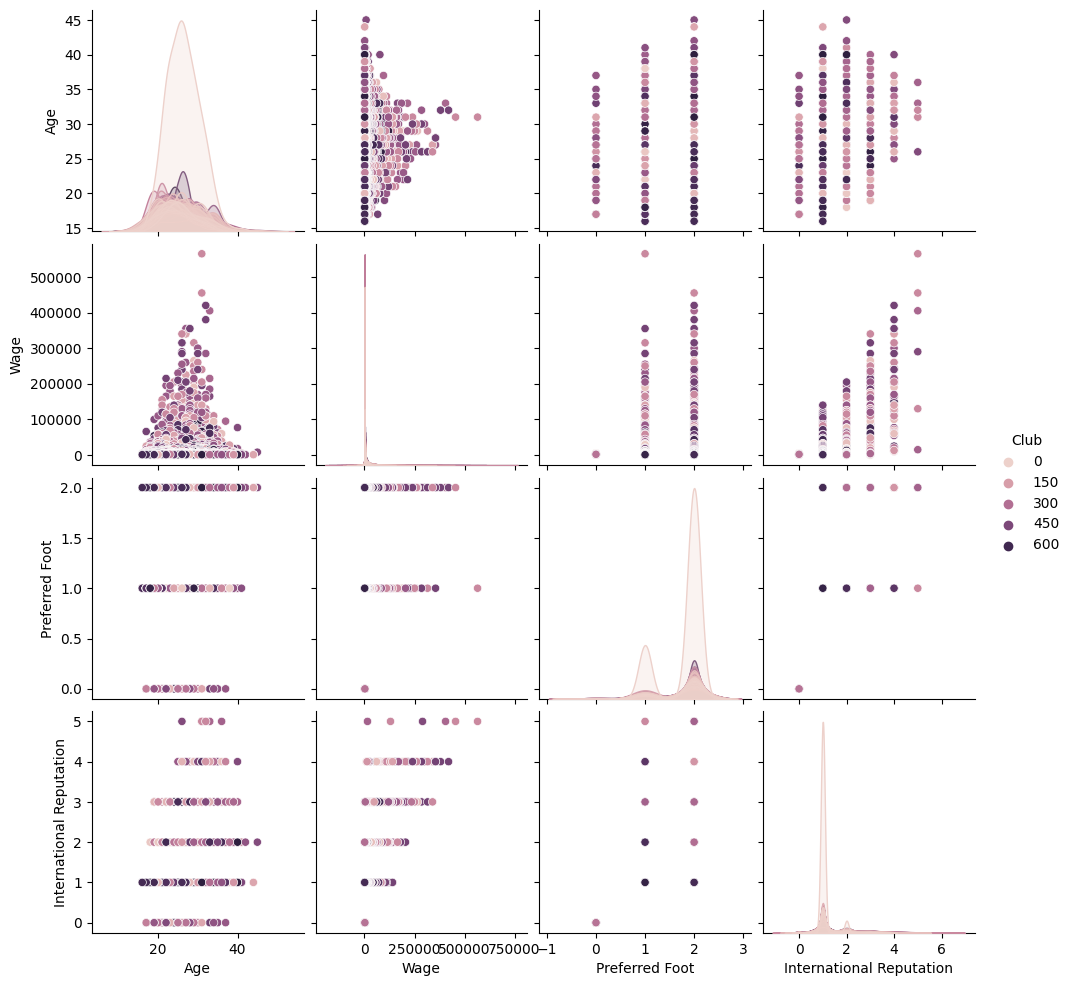

In [ ]:
sns.pairplot(fifadata, hue = "Club", vars = ["Age","Wage","Preferred Foot","International Reputation"])
plt.show()

<font size=3>   4.18 Check weeight for different Clubs with respect to age using lmplot

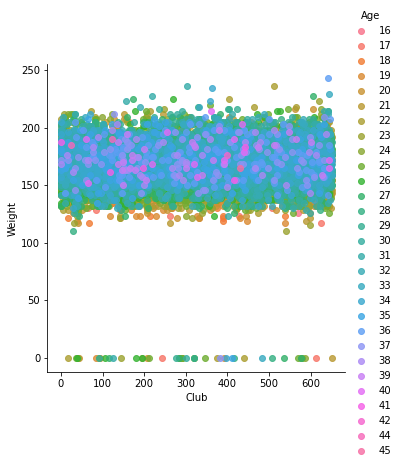

In [ ]:
sns.lmplot(x = "Club", y = "Weight", data = fifadata, hue = "Age", fit_reg = False)
plt.show()